In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [2]:
# Generate target time to check on L dependnece 
target = [ '1900-'+np.str(month).zfill(2)+'-'+np.str(15).zfill(2) for month in np.arange(1,13)]
# transform them in correct dtype
target = [np.datetime64(it) for it in target ]
target = [pd.DatetimeIndex([it]) for it in target ]

In [3]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



# PLOTS

In [4]:
# import cartopy.crs as ccrs


In [5]:
narr_clim_test_3d = xr.open_dataset('narr_clim_test_3d.nc')
persiann_clim_test_3d = xr.open_dataset('persiann_clim_test_3d.nc')
cpc_clim_test_3d = xr.open_dataset('cpc_clim_test_3d.nc')
ds_clim_test_3d = xr.open_dataset('ds_clim_test_3d.nc')

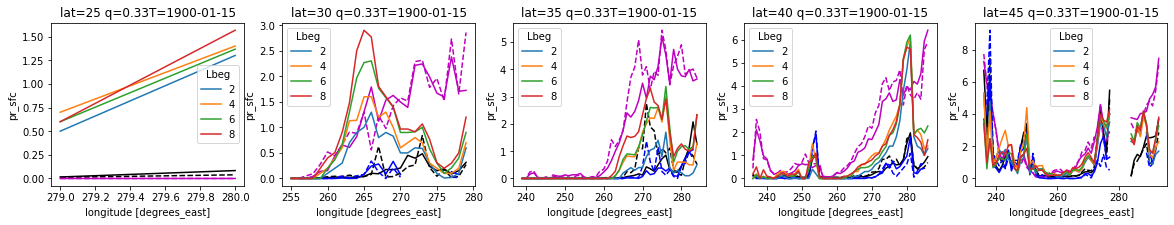

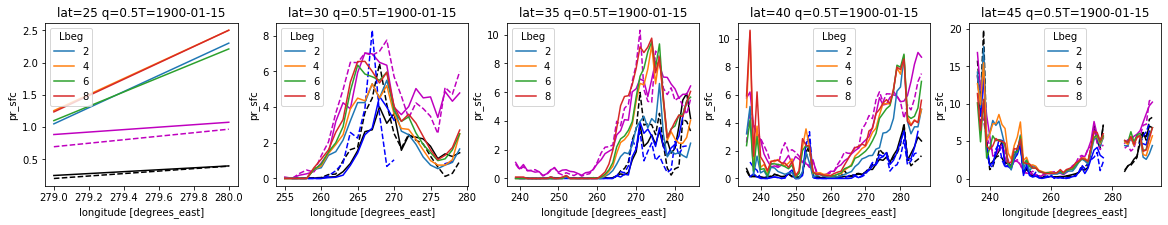

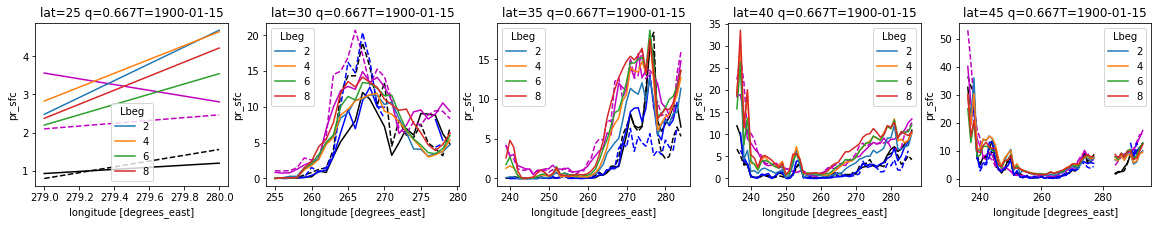

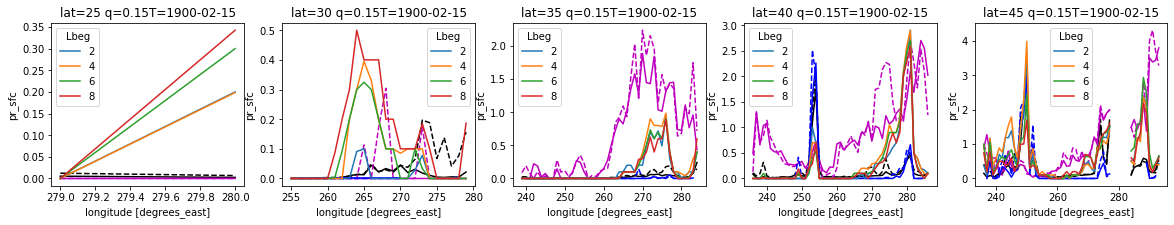

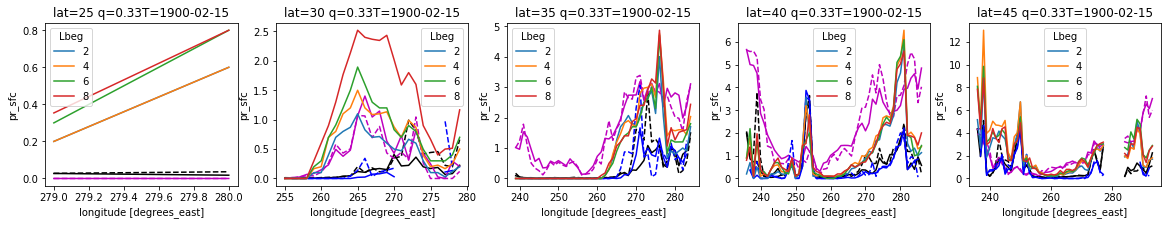

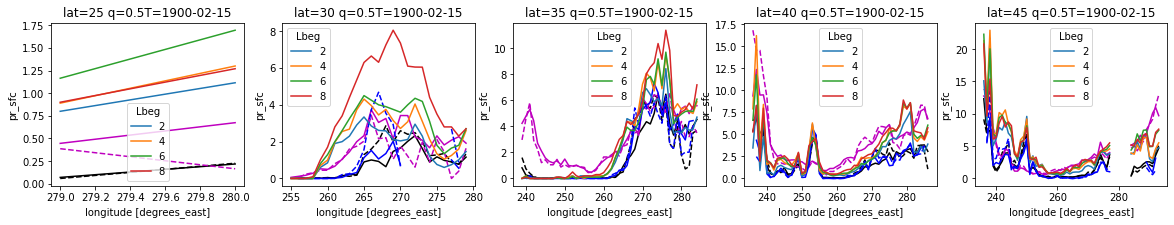

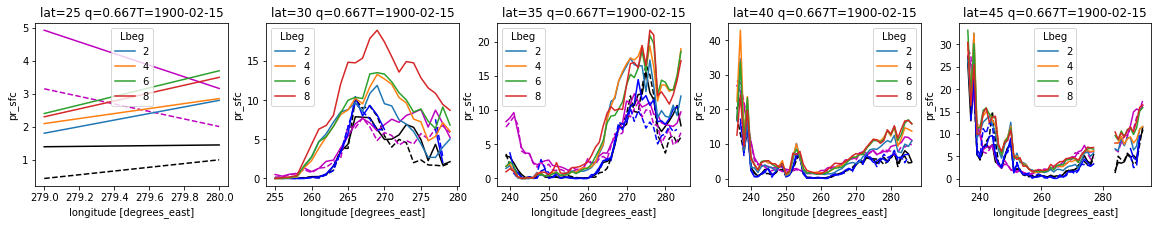

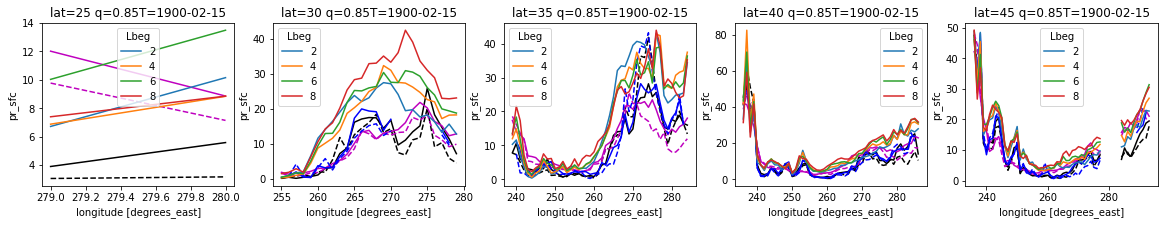

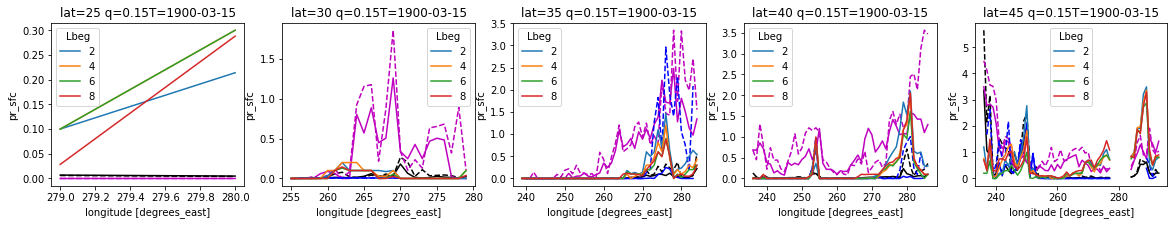

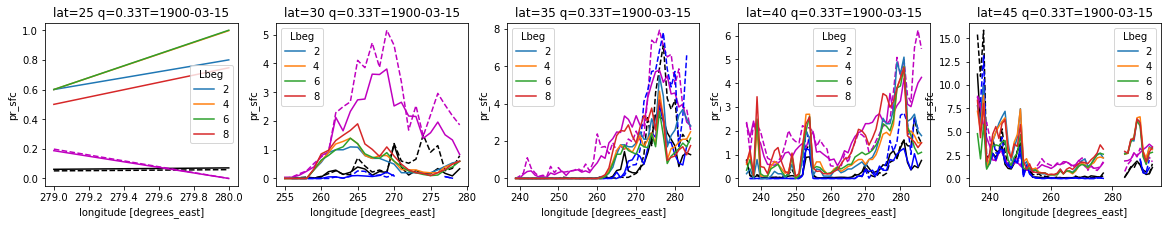

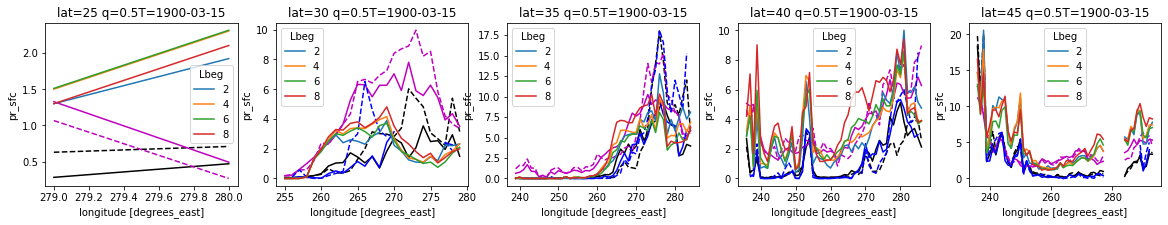

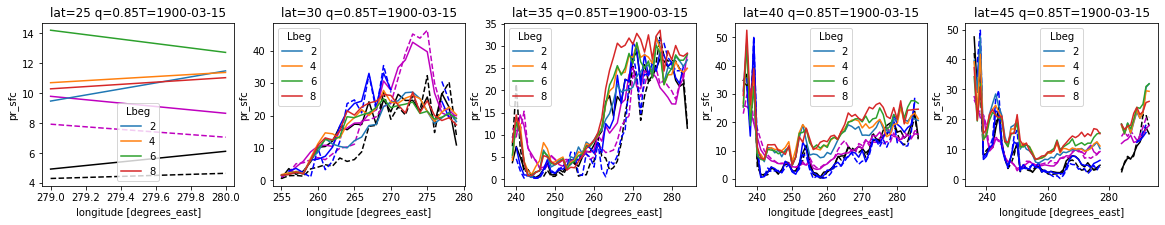

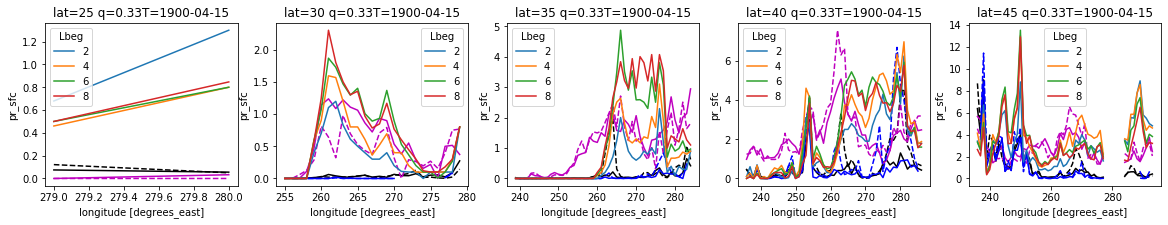

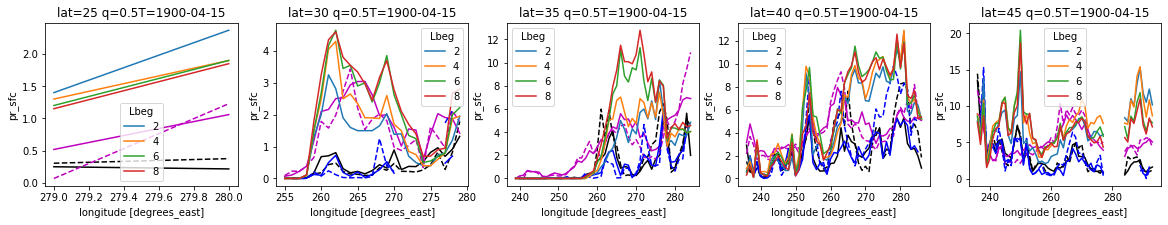

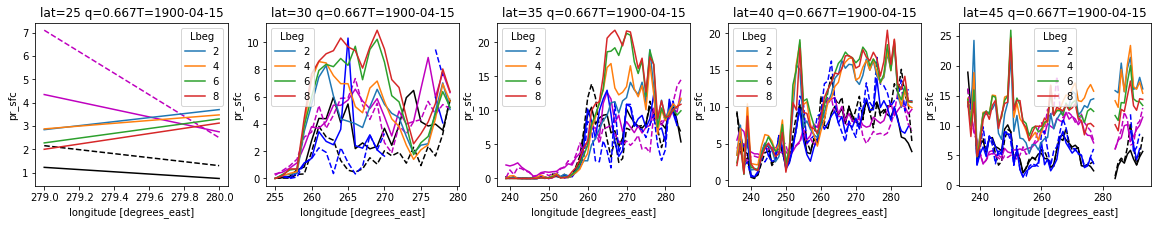

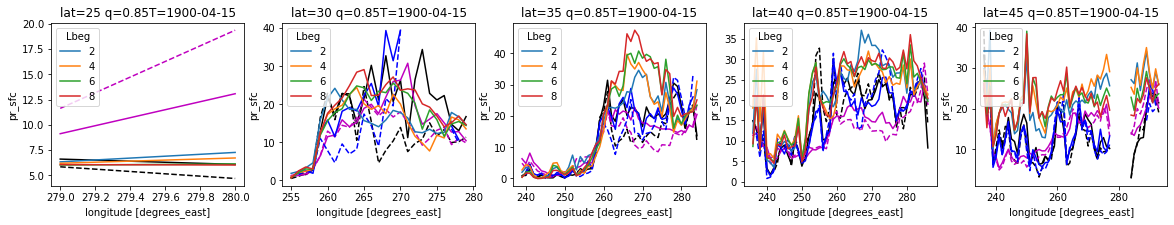

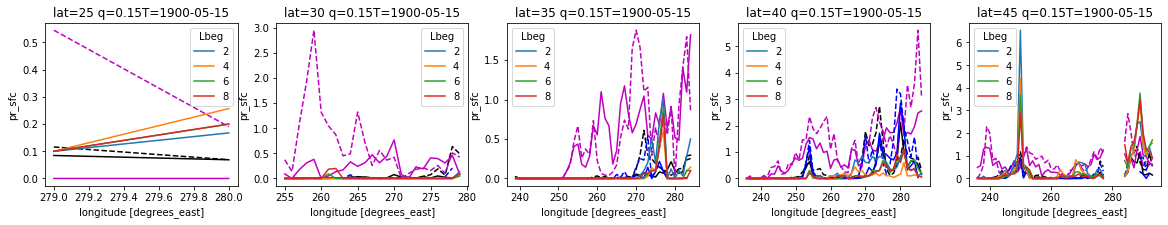

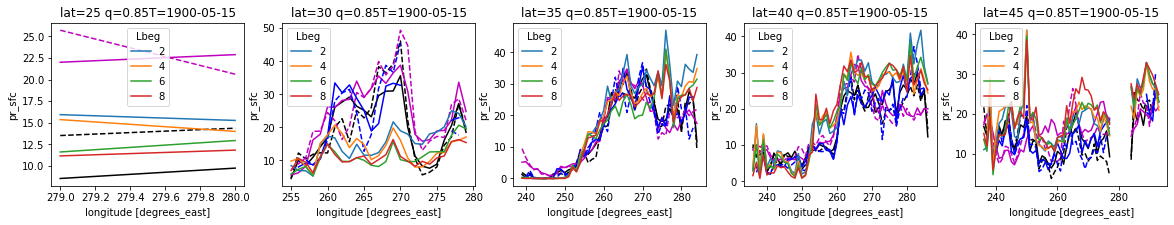

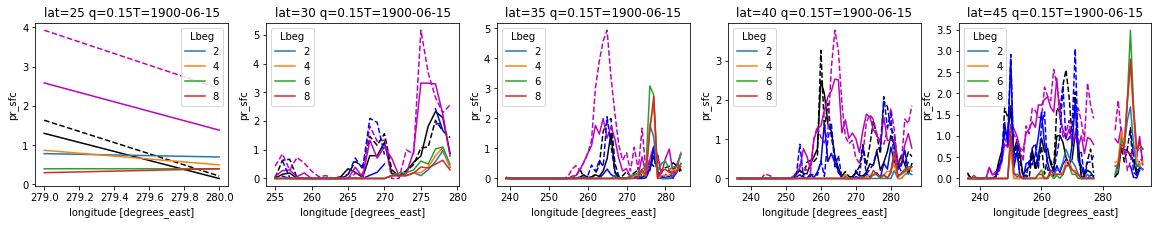

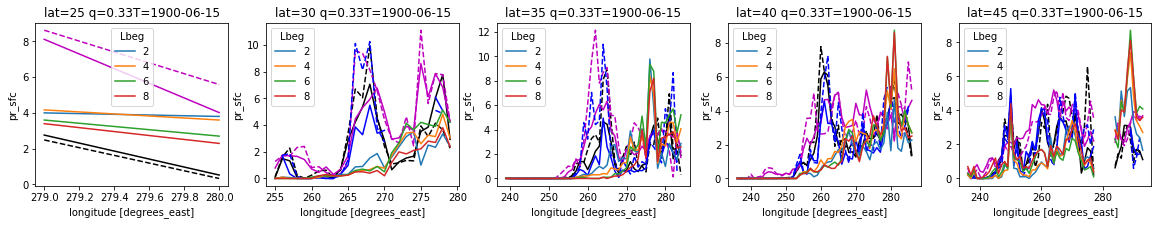

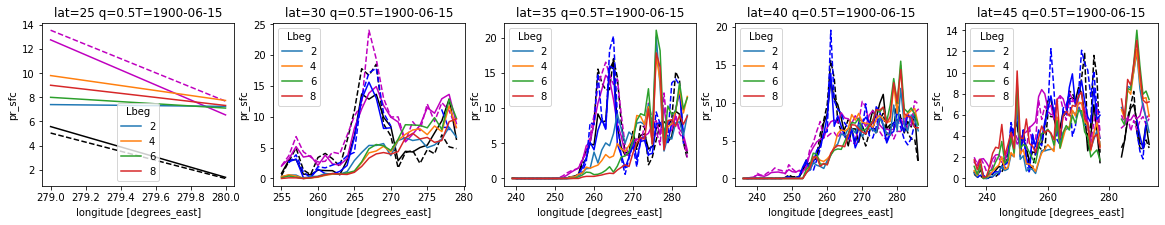

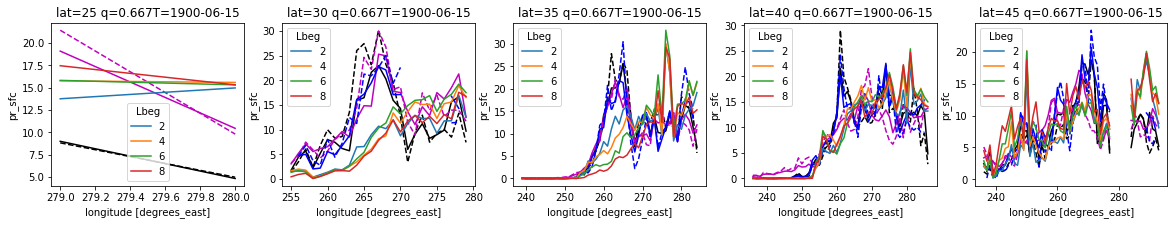

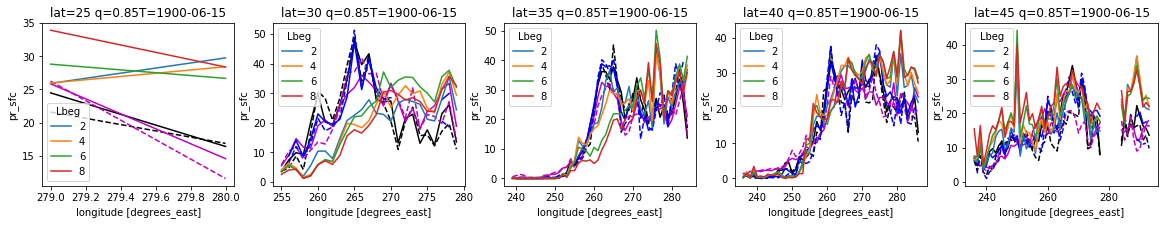

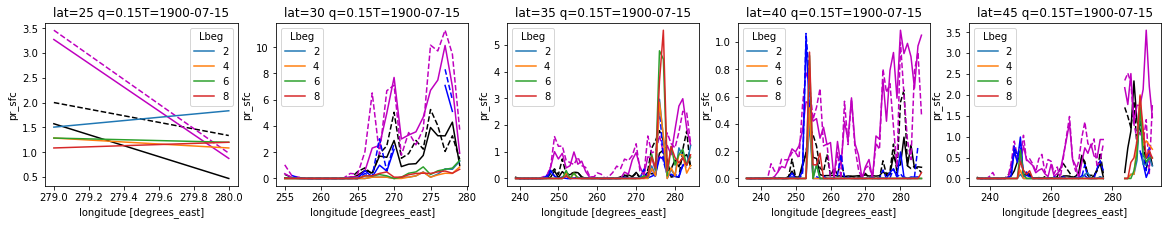

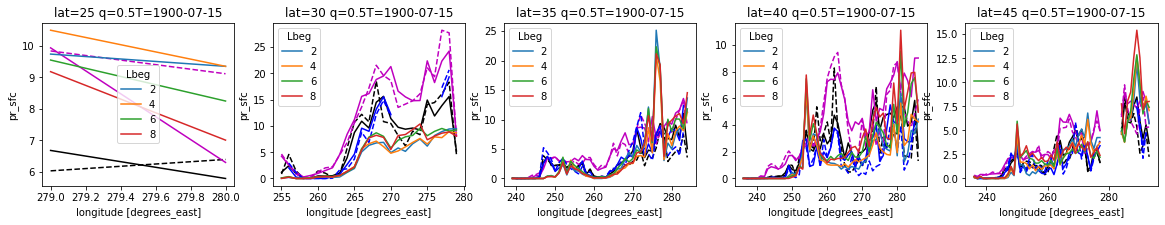

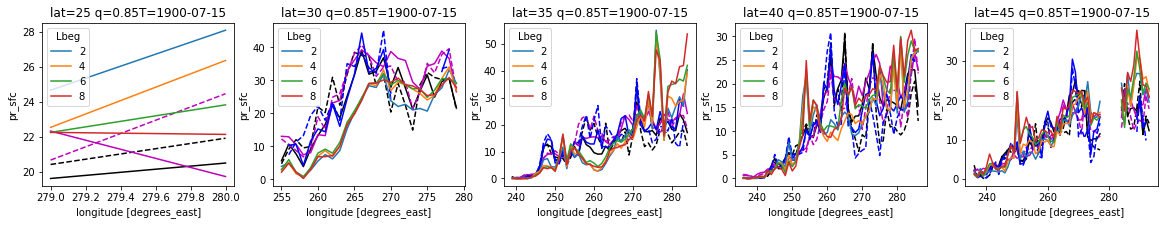

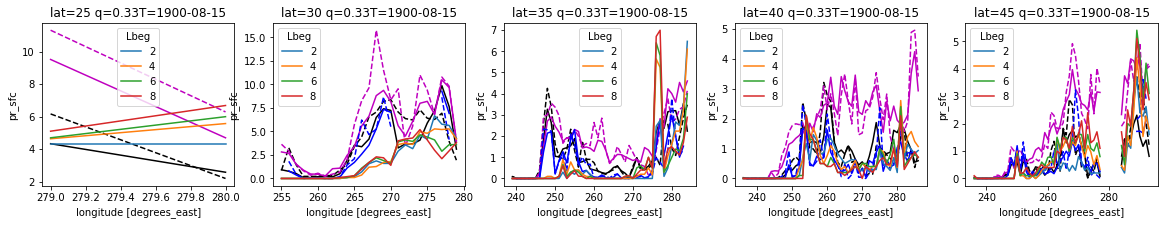

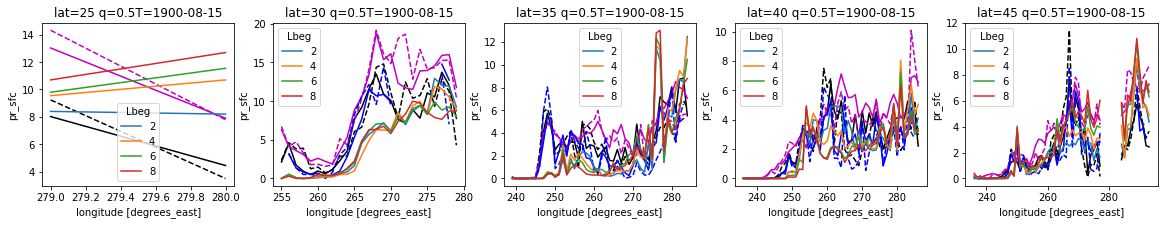

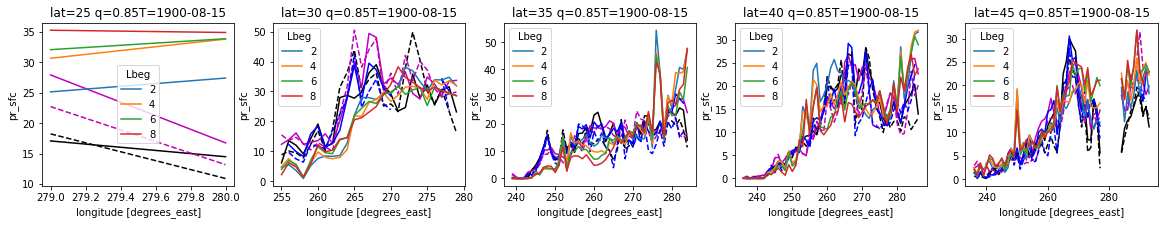

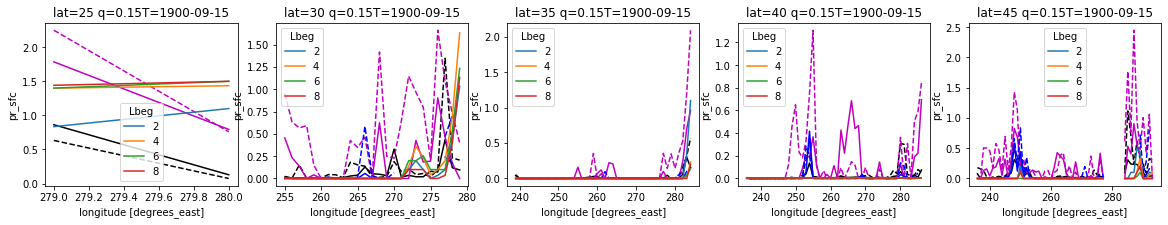

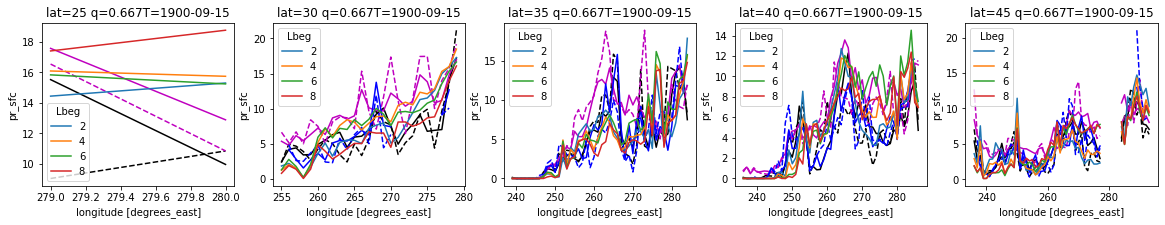

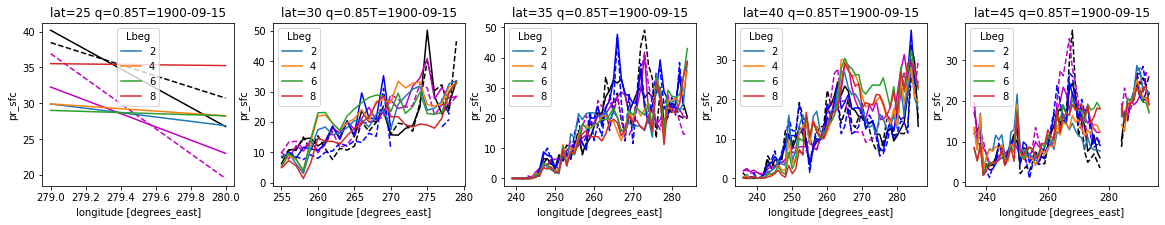

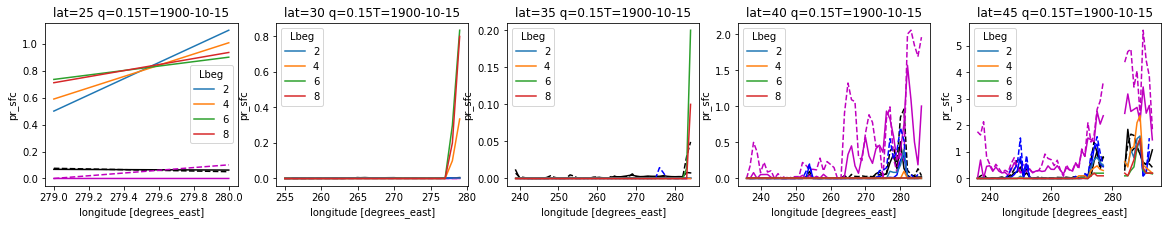

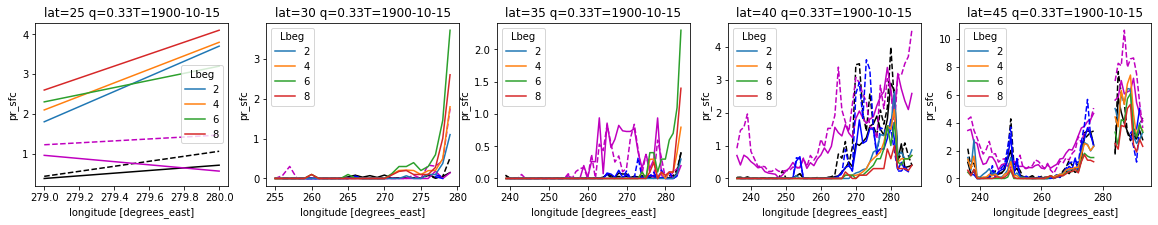

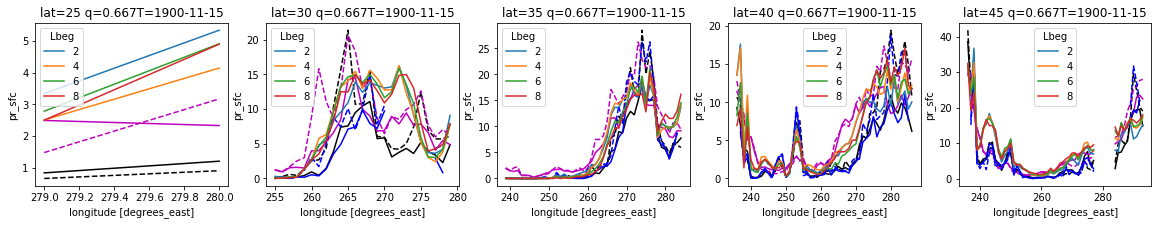

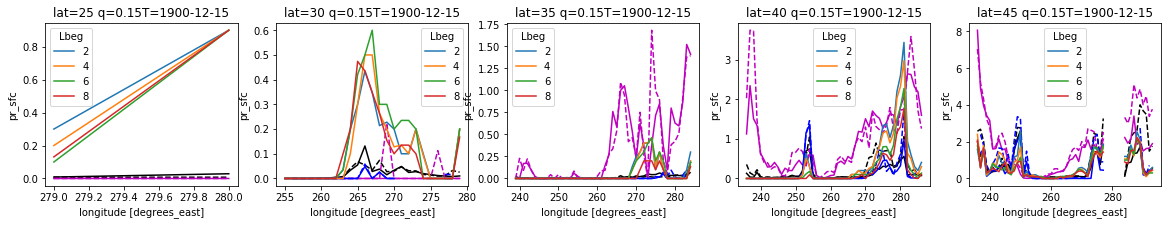

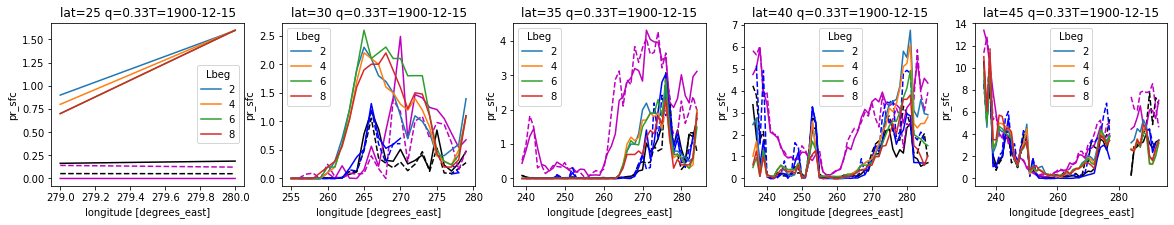

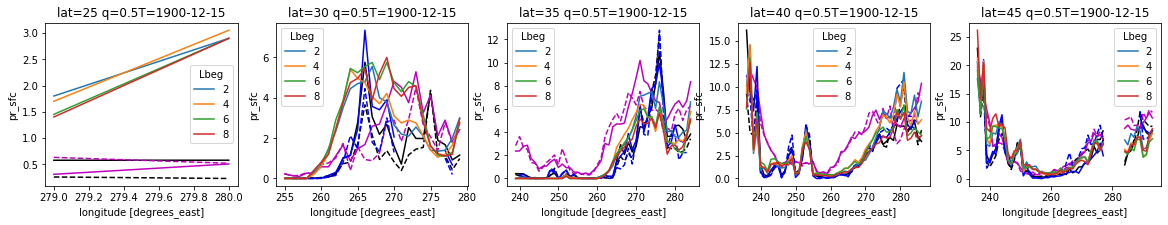

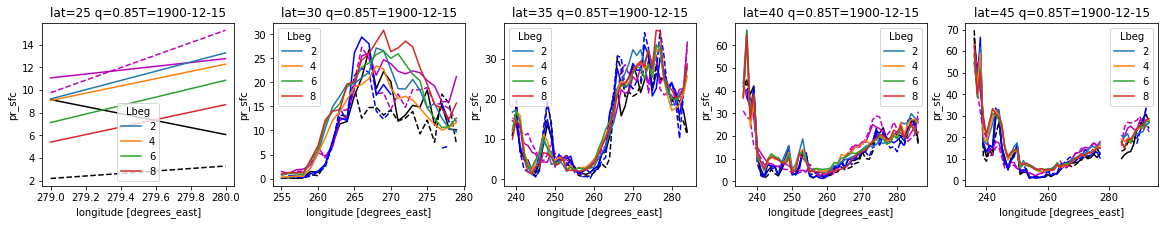

In [6]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
# map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

for iT in ds_clim_test_3d.target_clim:
    temp = ds_clim_test_3d.sel(target_clim=iT.values)
    tempn = narr_clim_test_3d.sel(target_clim=iT.values)
    tempp = persiann_clim_test_3d.sel(target_clim=iT.values)
    tempc = cpc_clim_test_3d.sel(target_clim=iT.values)
    for iq in temp.quant:
        temp1 = temp.sel(quant=iq.values)
        temp1n = tempn.sel(quant=iq.values)
        temp1p = tempp.sel(quant=iq.values)
        temp1c = tempc.sel(quant=iq.values)
        temp1 = xr.where(temp1<0,0,temp1)
        temp1p = xr.where(temp1p<0,0,temp1p)
        temp1c = xr.where(temp1c<0,0,temp1c)
        plt.figure(figsize=(20,3))
        for latp in np.arange(25,50,5 ):
            ax = plt.subplot(1,5, latp/5-4)
            temp1n.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[0].plot(linestyle='dashed',color='k',x='lon', ax=ax )
            temp1n.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[1].plot(linestyle='solid',color='k',x='lon', ax=ax )
            temp1p.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[0].plot(linestyle='dashed',color='m',x='lon', ax=ax )
            temp1p.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[1].plot(linestyle='solid',color='m',x='lon', ax=ax )
            temp1c.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[0].plot(linestyle='dashed',color='b',x='lon', ax=ax )
            temp1c.apcp.where(ds_mask.the_geom>0).sel(lat=latp)[1].plot(linestyle='solid',color='b',x='lon', ax=ax )
            temp1.pr_sfc.where(ds_mask.the_geom>0).sel(lat=latp).plot.line(x='lon', ax=ax)
            ax.set_title('lat='+np.str(latp)+' q='+np.str(iq.values)+'T='+np.str(iT.values)[:10])

        
        
#         for axi in outp.axes[:][0]:
#             axi.coastlines()
#             axi.add_feature(cfeature.BORDERS)
#             axi.add_feature(cfeature.STATES)